# Step01a: Data Cleaning
In this notebook we'll clean the data.

## Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [2]:
pitches = pd.read_csv('../../data/savant/scherzer_2015_to_2019.csv')
madmax = pitches.copy()

In [3]:
madmax.head();

In [4]:
madmax.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

## Columns to lowercase and replace spaces with '_'

In [5]:
new_cols = []

for c in madmax.columns:
    c = c.lower()
    c = c.replace(' ', '_')
    c = c.replace('(', '')
    c = c.replace(')', '')
    c = c.replace('_°', '')
    new_cols.append(c)
    
madmax.columns = new_cols

In [6]:
madmax.shape

(16296, 89)

In [7]:
madmax.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

## Ok, there are 89 columns and not all are important for this experiement.  Let's make a few prelininary column removals.

### Of the 89 columns, the following pertain to the experiment:
- pitch_type
- game_date (for purposes of discovering the sequential order of pitches for creatin of new features)
- release_speed
- events 
- description
- zone
- des
- stand
- home_team
- away_team
- type
- balls
- strikes
- on_3b
- on_2b
- on_1b
- outs_when_up
- inning
- inning_topbot
- sv_id
- release_spin_rate
- pitch_number
- pitch_name
- home_score
- away_score
- bat_score
- fld_score
- if_fielding_alignment
- of_fielding_alignment

In [8]:
keep_cols = ['pitch_type', 'game_date', 'batter', 'release_speed', 'events', 'description', 'zone', 'des', 'stand',
            'home_team', 'away_team', 'type', 'balls', 'strikes', 'on_3b', 'on_2b', 'on_1b', 'outs_when_up',
            'inning', 'inning_topbot', 'sv_id', 'release_spin_rate', 'pitch_number', 'pitch_name', 'bat_score', 
             'fld_score', 'if_fielding_alignment', 'of_fielding_alignment']

In [9]:
madmax = madmax[keep_cols]

In [10]:
madmax.columns

Index(['pitch_type', 'game_date', 'batter', 'release_speed', 'events',
       'description', 'zone', 'des', 'stand', 'home_team', 'away_team', 'type',
       'balls', 'strikes', 'on_3b', 'on_2b', 'on_1b', 'outs_when_up', 'inning',
       'inning_topbot', 'sv_id', 'release_spin_rate', 'pitch_number',
       'pitch_name', 'bat_score', 'fld_score', 'if_fielding_alignment',
       'of_fielding_alignment'],
      dtype='object')

## Columns look good, lets go through the data one column at a time
We will review the data in each column in order to assess its importance, the handling of null values, and any other issues we may come across

In [11]:
madmax.sort_values(by='sv_id')
# sv_id functions as an ID that sorts pitches over time.  Order will be required to pitch count calculations.

## For hitters, singles, doubles, triples, hrs cumulative up to that game (juicy part of data)

'''
Reviews -> pitchers
Pitches -> words
Sentences -> inning
doc -> game

lstm...???

Find best baseball scout, what would be there accuracy in terms of pitch outcome -> upperline expectation

Pitch type, location... focus on one only (location)

90% sure lstm can be used... need a sequential model ->  What people doing with this type of data and 
    sequential models as well.
    
Andrew Ng vids for sequential models

'''

'\nReviews -> pitchers\nPitches -> words\nSentences -> inning\ndoc -> game\n\nlstm...???\n\nFind best baseball scout, what would be there accuracy in terms of pitch outcome -> upperline expectation\n\nPitch type, location... focus on one only (location)\n\n90% sure lstm can be used... need a sequential model ->  What people doing with this type of data and \n    sequential models as well.\n    \nAndrew Ng vids for sequential models\n\n'

In [12]:
madmax.head()

,pitch_type,game_date,batter,release_speed,events,description,zone,des,stand,home_team,...,inning,inning_topbot,sv_id,release_spin_rate,pitch_number,pitch_name,bat_score,fld_score,if_fielding_alignment,of_fielding_alignment
0,FF,2019-09-24,656514,92.7,field_out,hit_into_play,6.0,Adam Haseley flies out to center fielder Victo...,L,WSH,...,6,Top,190925_005920,2299.0,1,4-Seam Fastball,4,2,Infield shift,Standard
1,CH,2019-09-24,664068,84.4,single,hit_into_play_no_out,9.0,Scott Kingery singles on a soft ground ball to...,R,WSH,...,6,Top,190925_005823,1494.0,5,Changeup,4,2,Standard,Standard
2,FF,2019-09-24,664068,97.4,NaN,foul,8.0,NaN,R,WSH,...,6,Top,190925_005750,2465.0,4,4-Seam Fastball,4,2,Standard,Standard
3,SL,2019-09-24,664068,84.8,NaN,ball,14.0,NaN,R,WSH,...,6,Top,190925_005726,2295.0,3,Slider,4,2,Standard,Standard
4,CU,2019-09-24,664068,79.1,NaN,foul,4.0,NaN,R,WSH,...,6,Top,190925_005705,2818.0,2,Curveball,4,2,Standard,Standard


### pitch_type
- Variable type: Dependant, Categorical
- Data type: string
- Unique values: 5
- Adding to target list

In [13]:
targets = ['pitch_type']

In [14]:
madmax.pitch_type.value_counts()

FF    8463
SL    3216
CH    2259
CU    1328
FC     904
FT      89
Name: pitch_type, dtype: int64

Based on the following link, Max throws five different types of pitches <br>
https://library.fangraphs.com/pitch-type-abbreviations-classifications/ <br><br>
__Max's Pitch Repertoire in 2019__
- FF: Four Seam Fastball
- SL: Slider
- CH: Changeup
- CU: Curveball
- FC: Fastball (Cutter)

This will ultimatly be one of two targets in this study.  Looks like Max's go to pitch is the four seam fastball with the changeup and curveball representing minority classes.

### game_date

In [15]:
# Following provides total pitch count per game
# Will later make date either a month category or a seasonal category (spring, summer, fall)
madmax.game_date.value_counts();

### release_speed
- Variable type: TBD, Continuous
- Data type: Float
- Number of unique Values: n/a

In [16]:
len(madmax.release_speed.value_counts())

261

In [17]:
madmax.release_speed.min(), madmax.release_speed.max()

(37.9, 99.4)

In [18]:
r = madmax.release_speed.max() - madmax.release_speed.min()
r/5

12.3

#### These velocities relate directly to pitch types, let's take a look at these values together

In [19]:
pitches = madmax.pitch_type.unique()
pitches

array(['FF', 'CH', 'SL', 'CU', 'FC', nan, 'FT'], dtype=object)

In [20]:
results = {}
p_count = 1
for p in pitches:
    avg = madmax.loc[(madmax.pitch_type == p)].release_speed.mean()
    low = madmax.loc[(madmax.pitch_type == p)].release_speed.min()
    high = madmax.loc[(madmax.pitch_type == p)].release_speed.max()
    i = str('p{}'.format(p_count))
    results[i] = [p, avg, low, high]
    p_count += 1 

In [21]:
results = pd.DataFrame(results).T
results.columns = ['pitch_type', 'mean', 'min', 'max']
results

,pitch_type,mean,min,max
p1,FF,94.6305,87.3,99.4
p2,CH,84.773,77.3,89.9
p3,SL,85.9646,80.2,91.9
p4,CU,78.5738,72.5,83
p5,FC,88.9015,85.3,93.9
p6,NaN,NaN,NaN,NaN
p7,FT,93.4517,90.1,97.1


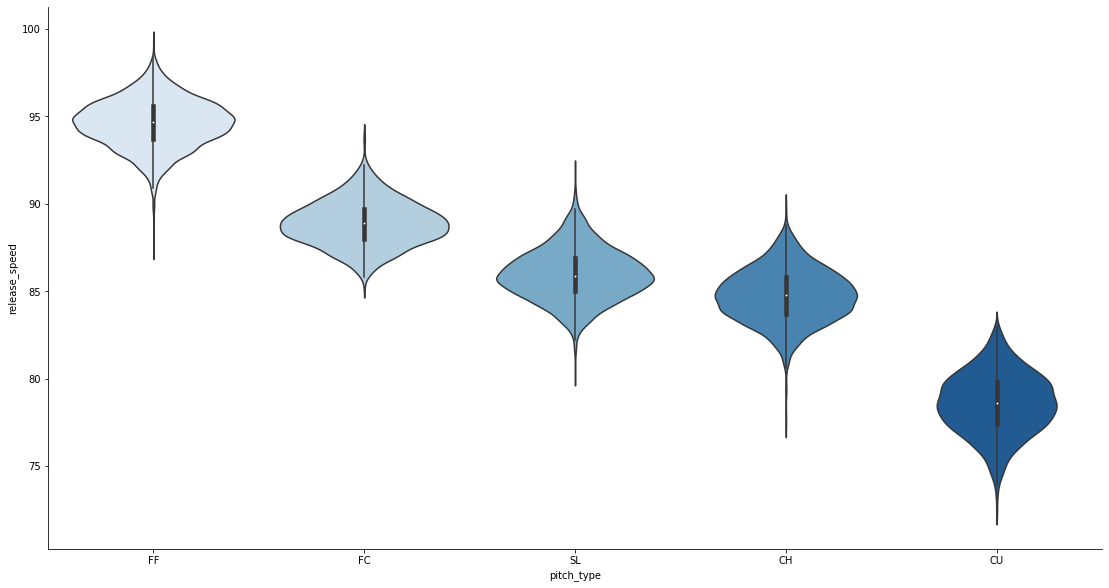

In [22]:
vio = sns.catplot(x = 'pitch_type', 
            y = 'release_speed', 
            kind = 'violin', 
            data=madmax, 
            order = ['FF', 'FC', 'SL', 'CH', 'CU'], 
            palette='Blues',
            height=8.27, 
            aspect=15/8);

vio.savefig('../viz/pitch_type_speed_violins_2015_to_2019.png')

### Key takeaway: Consider combining the slider and curveball pitches to one category
- Good separation between four seem fastball, fastball cutter, and the change up
- The slider and curveball exhibit closer mph than other pitches

### events
- This will be an interesting feature for other experiments, but not for this one
- Adding to a kill_col list that will be used to drop all killed columns in one line at the end of this notebook

In [23]:
madmax.events.value_counts();

In [24]:
kill_cols = ['events']

### description
- Same as events just above

In [25]:
kill_cols.append('description')

### des
- Don't need this columns after inspection
    - Same reasons as events and description

In [26]:
kill_cols.append('des')

### release_spin_rate
- Variable type: Independant, Continuous
- Data type: Int
- Unique Values: n/a

In [27]:
madmax.release_spin_rate.describe();

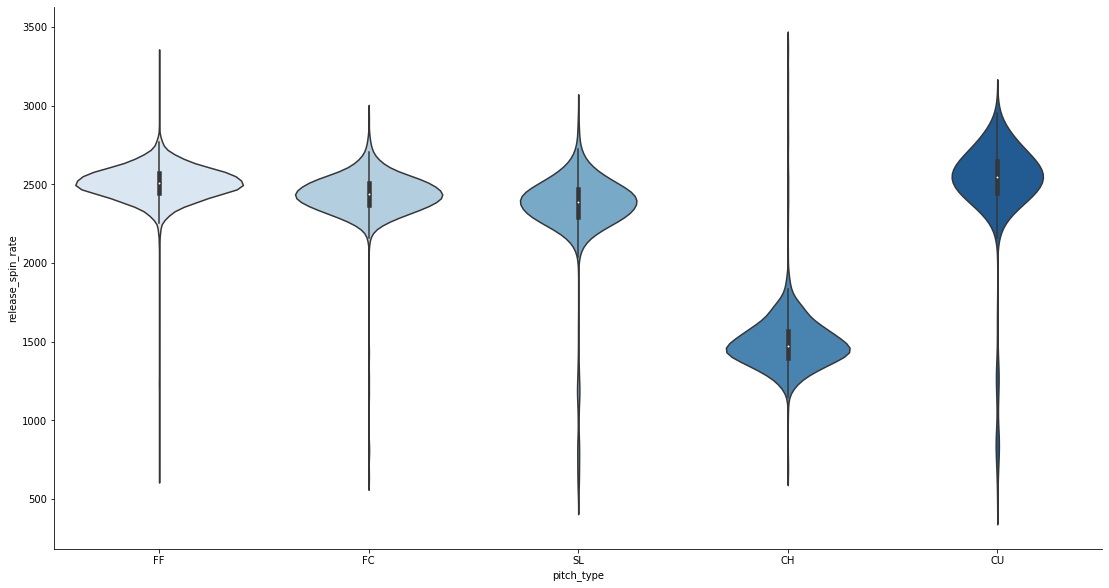

In [28]:
cat = sns.catplot(x = 'pitch_type', 
            y = 'release_spin_rate', 
            kind = 'violin', 
            data=madmax, 
            order = ['FF', 'FC', 'SL', 'CH', 'CU'], 
            palette='Blues',
            height=8.27, 
            aspect=15/8);

cat.savefig('../viz/pitch_type_spin_violins_2015_to_2019.png')

Wow, Mad Max's spin rate is similar for his four-seam fastball, cutter, and slider.  All though his curveball is close, to these other three values, his changeup appears to spin much less than his other pitches.

### stand
- Is R or L for the handedness of the batter
- Will be a categorical, independant variable
- Relativley even totals between the two classes

In [29]:
madmax.stand.value_counts()

L    8569
R    7727
Name: stand, dtype: int64

### zone
- Variable type: Independant, Continuous
- Data type: Int
- Number unique Values: 13
    - This is an integral dependant variable in the experiment and indicates where the pitch is thrown in or out of the strike zone
    - These number 1 - 14 
    - For example, with a right-handed hitter zone 3 is high and inside whereas for a left-handed hitter zone 3 is high and outside
    
<br>
<img src='../../images/statcast_zones.png' alt='Drawing' style='width: 450px;'/><br>

In [30]:
# zone = sns.catplot(x = 'pitch_type', 
#             y = 'zone', 
#             kind = 'swarm', 
#             data=madmax, 
#             order = ['FF', 'FC', 'SL', 'CH', 'CU'], 
#             palette='Blues',
#             height=8.27, 
#             aspect=15/8);

# zone.savefig('../viz/pitch_type_zone_swarm_2015_to_2019.png')

 __Key Takeaway:__ Need to consider combining zone with handedness of the batter to discern "inside" or "outside" categories vs. numeric values

### home_team
- Will be an interesting feature to explore in relation to the Nationals only

In [31]:
madmax.home_team.value_counts()

WSH    8274
MIA    1070
ATL    1058
NYM    1045
PHI     720
MIL     423
STL     422
ARI     394
SF      373
BAL     339
LAD     326
SD      318
CIN     315
CHC     310
COL     200
PIT     169
NYY     116
DET     115
TOR     108
TB      104
CWS      97
Name: home_team, dtype: int64

### nats_home1_away0 (new feature)

In [32]:
madmax['nats_home1_away0'] = madmax.home_team.apply(lambda h: 1 if h == 'WSH' else 0)

In [33]:
madmax.nats_home1_away0.value_counts()

1    8274
0    8022
Name: nats_home1_away0, dtype: int64

### away_team
- Don't need this column as home_team indicates if the Nats are home or away

In [34]:
kill_cols.append('away_team')

### type column
- Indicates if the pitch was a ball (taken), strike (taken), or a hit (indicated with X)
- Result of pitch occurs after the pitch and does not relate to location so will be removed

In [35]:
madmax.type.value_counts()

S    8733
B    5065
X    2498
Name: type, dtype: int64

In [36]:
kill_cols.append('type')

### balls
- When combined with strikes, the count of the pitch is created
- Will be key categorical, independant variable
- After new column creation, feature no longer need and to be added to kill_cols

In [37]:
kill_cols.append('balls')

### strikes
- When combined with balls, creates the count
- Will be key categorical, independant variable
- After new column creation, feature no longer need and to be added to kill_cols

In [38]:
kill_cols.append('strikes')

### balls_strikes (new feature)
- Combines balls and strikes as a string/Pandas object

In [39]:
madmax['balls_strikes'] = madmax.balls.astype(str) + '_' + madmax.strikes.astype(str)

In [40]:
madmax.balls_strikes.value_counts()

0_0    4140
0_1    2397
1_2    1818
0_2    1529
1_1    1513
2_2    1431
1_0    1343
3_2     734
2_1     676
2_0     378
3_1     230
3_0     107
Name: balls_strikes, dtype: int64

Wow, Mad Max only had sixteen 3-0 counts in the 2019 regular season?  That is impressive.

In [41]:
# counts = sns.catplot(x = 'pitch_type', 
#             y = 'release_speed', 
#             kind = 'swarm', 
#             data = madmax, 
#             order = ['FF', 'FC', 'SL', 'CH', 'CU'], 
#             palette = 'Blues',
#             hue = 'balls_strikes',
#             height = 8.27, 
#             aspect = 15/8);

# counts.savefig('../viz/pitch_type_speed_count_swarm_2015_to_2019.png')

__Key Takeaway__: On superficial inspection, it looks like random spread of pitch selection and velocity by count values

### on_3b
- null if no runner on 3rd base and player ID of plyer on 3rd if occupied
- Will change to 0 if empty and 1 if occupied for this experiment

In [42]:
madmax.on_3b = madmax.on_3b.fillna(value=0)

In [43]:
madmax.on_3b

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
16291    0.0
16292    0.0
16293    0.0
16294    0.0
16295    0.0
Name: on_3b, Length: 16296, dtype: float64

In [44]:
madmax.on_3b = madmax.on_3b.apply(lambda r3: 0 if r3 == 0 else 1)

In [45]:
madmax.on_3b.value_counts()

0    15339
1      957
Name: on_3b, dtype: int64

### on_2b
- Same treatment as on_3b

In [46]:
madmax.on_2b = madmax.on_2b.fillna(value=0)
madmax.on_2b
madmax.on_2b = madmax.on_2b.apply(lambda r2: 0 if r2 == 0 else 1)
madmax.on_2b.value_counts()

0    14096
1     2200
Name: on_2b, dtype: int64

### on_1b
- Same treatment as on_3b

In [47]:
madmax.on_1b = madmax.on_1b.fillna(value=0)
madmax.on_1b
madmax.on_1b = madmax.on_1b.apply(lambda r1: 0 if r1 == 0 else 1)
madmax.on_1b.value_counts()

0    12510
1     3786
Name: on_1b, dtype: int64

### all_runners (new feature)
- Combines on_1b, on_2b, and on_3b as one, categorical variable

In [48]:
madmax['all_runners'] = 'fb:' + madmax.on_1b.iloc[:].astype(str) + '_' + \
                            'sb:' + madmax.on_2b.iloc[:].astype(str) + '_' +\
                            'tb:' + madmax.on_3b.iloc[:].astype(str)

In [49]:
madmax.all_runners.value_counts()

fb:0_sb:0_tb:0    10794
fb:1_sb:0_tb:0     2658
fb:0_sb:1_tb:0     1173
fb:1_sb:1_tb:0      714
fb:1_sb:0_tb:1      335
fb:0_sb:0_tb:1      309
fb:0_sb:1_tb:1      234
fb:1_sb:1_tb:1       79
Name: all_runners, dtype: int64

In [50]:
madmax.columns

Index(['pitch_type', 'game_date', 'batter', 'release_speed', 'events',
       'description', 'zone', 'des', 'stand', 'home_team', 'away_team', 'type',
       'balls', 'strikes', 'on_3b', 'on_2b', 'on_1b', 'outs_when_up', 'inning',
       'inning_topbot', 'sv_id', 'release_spin_rate', 'pitch_number',
       'pitch_name', 'bat_score', 'fld_score', 'if_fielding_alignment',
       'of_fielding_alignment', 'nats_home1_away0', 'balls_strikes',
       'all_runners'],
      dtype='object')

Wow, Mad Max only had the bases loaded twenty times all season, impressive.

### outs_when_up
- Outs when batter is at the plate
- Quantities of each class are close in aggregate value

In [51]:
madmax.outs_when_up.value_counts()

1    5574
2    5385
0    5337
Name: outs_when_up, dtype: int64

### inning
- Indicates what inning the pitch was thrown

In [52]:
madmax.inning.value_counts()

1    2577
4    2526
2    2353
3    2346
5    2330
6    2028
7    1491
8     506
9     139
Name: inning, dtype: int64

### inning_topbot
- Don't need this feature as it results from the Nats being home or away
- Adding to kill_cols

In [53]:
kill_cols.append('inning_topbot')

### sv_id
- Used to order pitches chronologically when ascending
- Will be retained until ordering pitches is no longer neccessary

### pitch_number
- Equals the running count of pitches thrown to the batter in that appearance;
- Resets with each new batter

In [54]:
madmax.pitch_number

0        1
1        5
2        4
3        3
4        2
        ..
16291    5
16292    4
16293    3
16294    2
16295    1
Name: pitch_number, Length: 16296, dtype: int64

### pitch_name
- Redundant column for pitch_type column
- Will remove

In [55]:
kill_cols.append('pitch_name')

### bat_score
- Score of batting team aka not the Nats
- Will change to opp_score (opponent score)

In [56]:
madmax = madmax.rename(columns={'bat_score': 'opp_score'})

### fld_score
- Score of fielding team aka the Nats
- Will change to nat_score

In [57]:
madmax = madmax.rename(columns={'fld_score': 'nats_score'})

### if_fielding_alignment
- Indicates standard or shift of the infield

In [58]:
madmax.if_fielding_alignment.value_counts()

Standard         12512
Infield shift     2185
Strategic         1325
Name: if_fielding_alignment, dtype: int64

### of_fielding_alignment
- Indicates standard or shift of the outfield

In [59]:
madmax.of_fielding_alignment.value_counts()

Standard     14553
Strategic     1469
Name: of_fielding_alignment, dtype: int64

## That's a good start to our data set, at this point, we will export to csv and continue in the next step

In [60]:
madmax = madmax.drop(columns=kill_cols)

In [61]:
madmax.to_csv('../../data/processed/scherzer/madmax_cleaned_2015_to_2019.csv')